In [2]:
import pandas as pd

In [3]:
# Only for some stats so original data in absolute path if fine
df = pd.read_csv('/Users/sethvanderbijl/Coding Projects/DM_project_2/data/training_set_VU_DM.csv')

In [ ]:
# shape, column types, NaNs, monotonicity, distributions, ranges

In [4]:
# Shape
df.shape

(4958347, 54)

In [8]:
# unique destinations, searches, properties, sites
print(df['srch_id'].unique().size)
print(df['prop_country_id'].unique().size)
print(df['prop_id'].unique().size)

199795
172
129113


In [9]:
# types of the columns
from collections import defaultdict
ddict = defaultdict(int)
for col in df.columns:
    ddict[df[col].dtype]+=1
ddict

defaultdict(int, {dtype('int64'): 19, dtype('O'): 1, dtype('float64'): 34})

In [11]:
# How many id columns
[col for col in df.columns if 'id' in col]

['srch_id',
 'site_id',
 'visitor_location_country_id',
 'prop_country_id',
 'prop_id',
 'srch_destination_id']

In [10]:
# Ranges of the columns
import math
l =[]
for col in df.columns:
    l.append(math.floor(len(str(df[col].max()))/3))
from collections import Counter
Counter(l)
# 0 means < 100, 1 means < 100.000, 2 means < 100.000.000, 3 means < 100.000.000.000, 6 means 100.000.000.000.000.000.000
# Of each one we have 13, 25, 12, 3, 1

Counter({2: 12, 6: 1, 0: 13, 1: 25, 3: 3})

/var/folders/gx/c6cqbmz17cqcb4nq4ynrjcn80000gn/T/ipykernel_9409/700318536.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(['', '100','', '100^2','', '100^3','', '100^4','','','100^6', '', ''])


[Text(0.0, 0, ''),
 Text(0.5, 0, '100'),
 Text(1.0, 0, ''),
 Text(1.5, 0, '100^2'),
 Text(2.0, 0, ''),
 Text(2.5, 0, '100^3'),
 Text(3.0, 0, ''),
 Text(3.5, 0, '100^4'),
 Text(4.0, 0, '')]

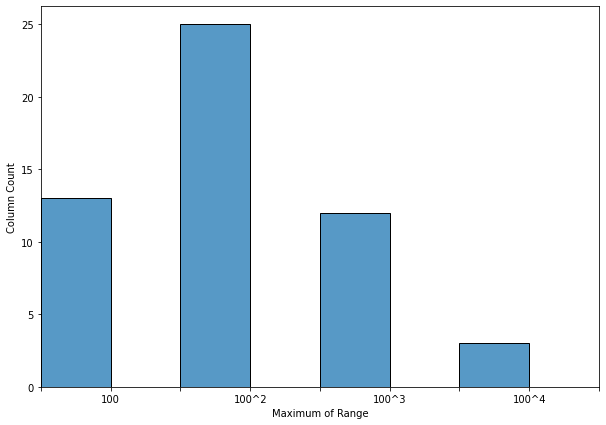

In [46]:
# Let's make a histogram of ranges
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
s = sns.histplot(data=l) #Interestingly a chi-square!
s.set_xlim(0,4)
s.set(xlabel='Maximum of Range', ylabel='Column Count')
s.set_xticklabels(['', '100','', '100^2','', '100^3','', '100^4','','','100^6', '', ''])

In [39]:
# NaNs
import numpy as np
nans = [(col, df[col].isna().astype(int).sum()/df.shape[0]) for col in df.columns]
nans

[('srch_id', 0.0),
 ('date_time', 0.0),
 ('site_id', 0.0),
 ('visitor_location_country_id', 0.0),
 ('visitor_hist_starrating', 0.949203635808466),
 ('visitor_hist_adr_usd', 0.9489773507178905),
 ('prop_country_id', 0.0),
 ('prop_id', 0.0),
 ('prop_starrating', 0.0),
 ('prop_review_score', 0.0014851723770038683),
 ('prop_brand_bool', 0.0),
 ('prop_location_score1', 0.0),
 ('prop_location_score2', 0.2199015115319682),
 ('prop_log_historical_price', 0.0),
 ('position', 0.0),
 ('price_usd', 0.0),
 ('promotion_flag', 0.0),
 ('srch_destination_id', 0.0),
 ('srch_length_of_stay', 0.0),
 ('srch_booking_window', 0.0),
 ('srch_adults_count', 0.0),
 ('srch_children_count', 0.0),
 ('srch_room_count', 0.0),
 ('srch_saturday_night_bool', 0.0),
 ('srch_query_affinity_score', 0.935985520981085),
 ('orig_destination_distance', 0.32425766086964064),
 ('random_bool', 0.0),
 ('comp1_rate', 0.9758125036428471),
 ('comp1_inv', 0.9738705258022482),
 ('comp1_rate_percent_diff', 0.9809535314894258),
 ('comp2_r

/Users/sethvanderbijl/Coding Projects/DM_project_2/.venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


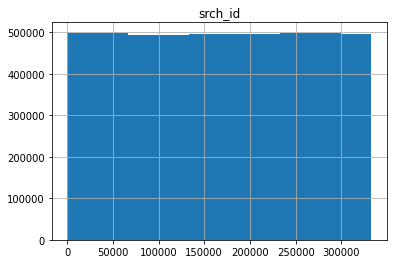

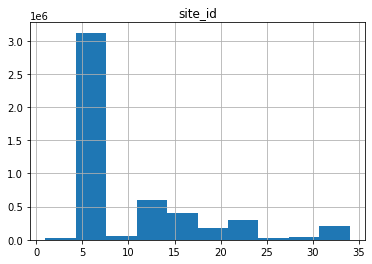

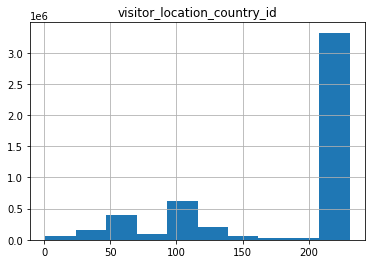

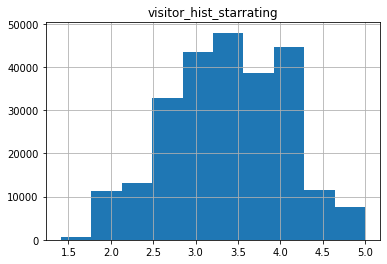

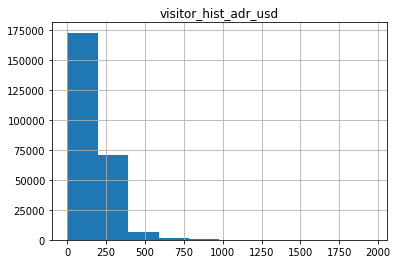

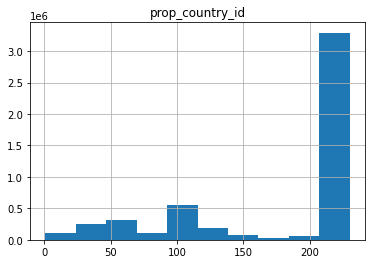

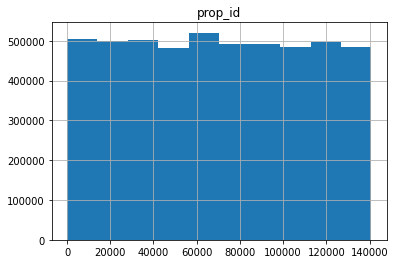

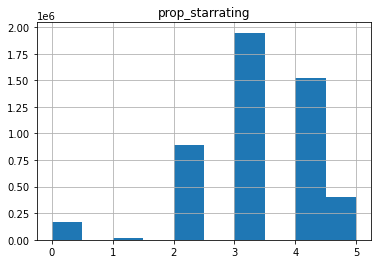

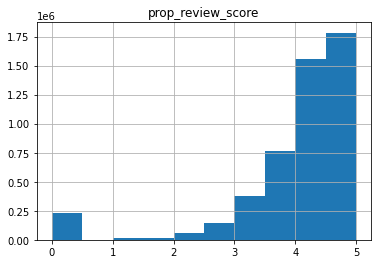

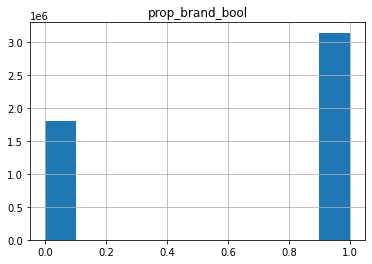

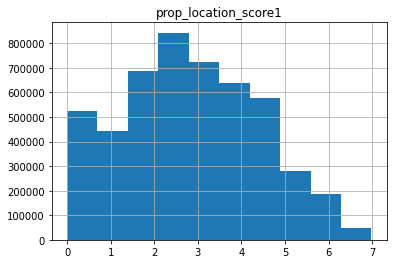

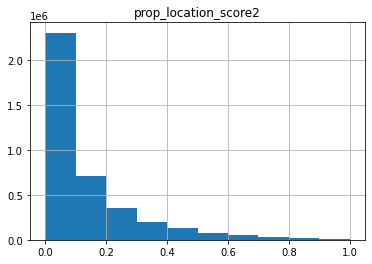

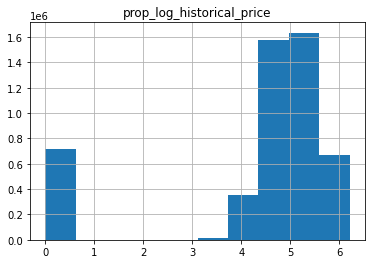

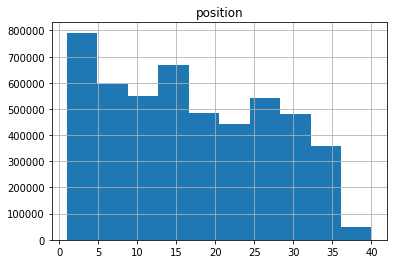

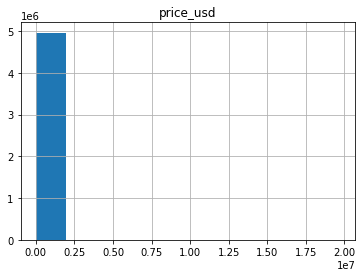

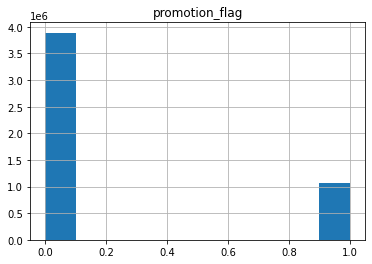

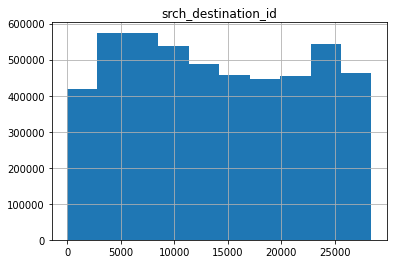

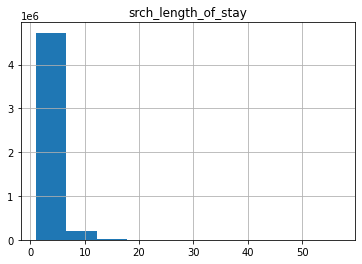

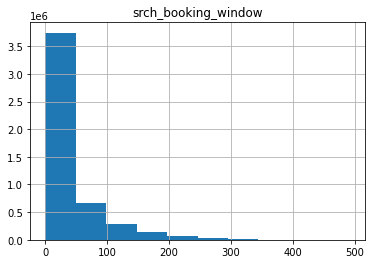

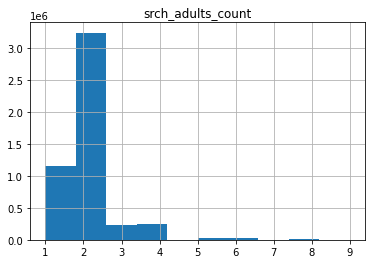

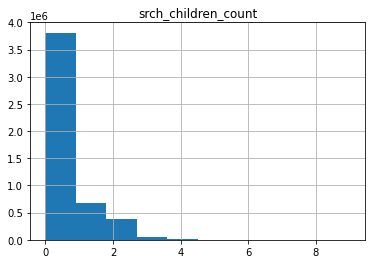

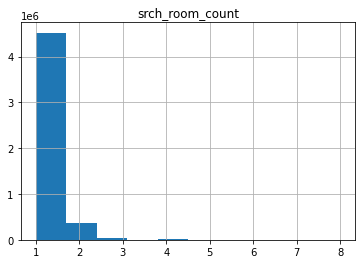

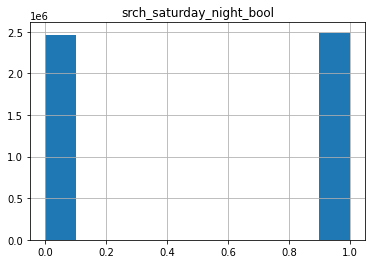

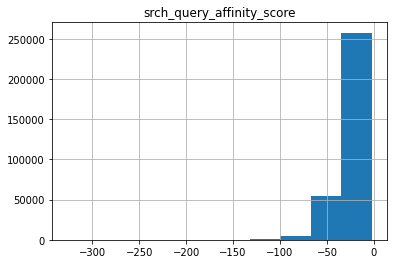

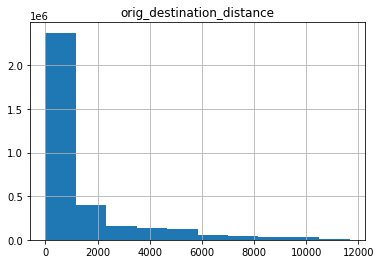

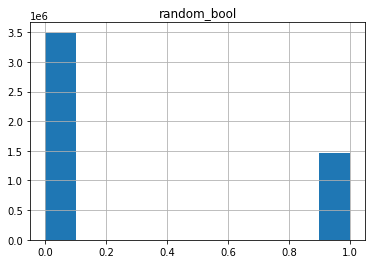

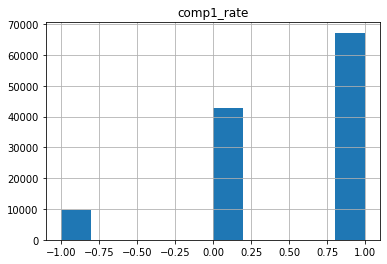

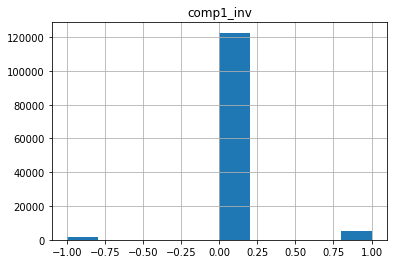

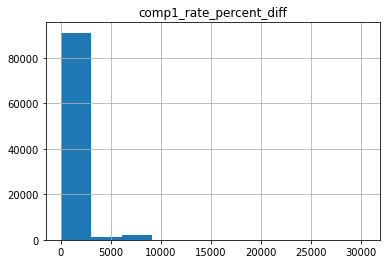

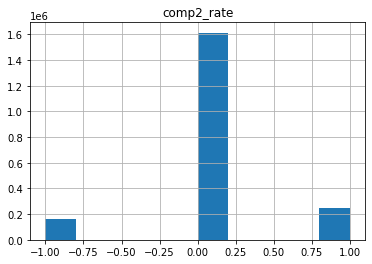

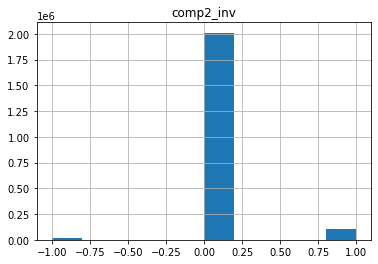

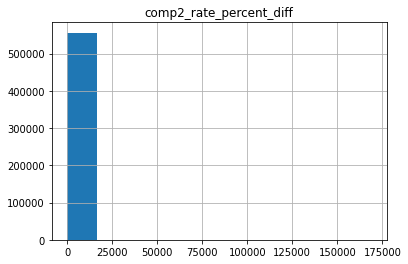

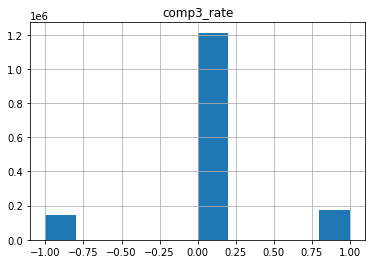

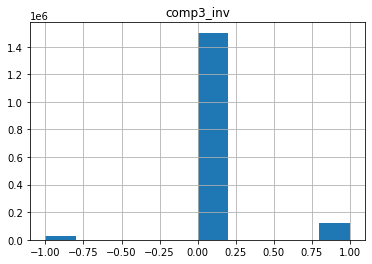

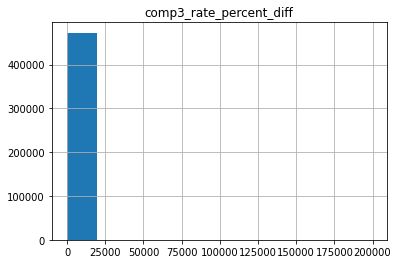

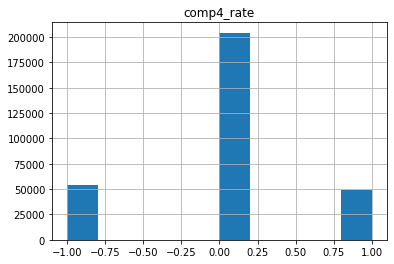

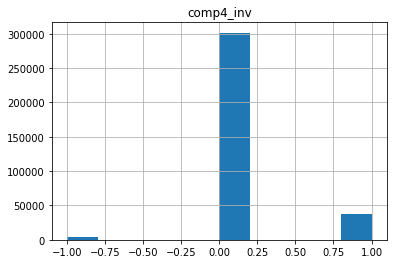

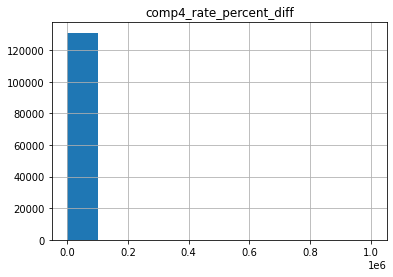

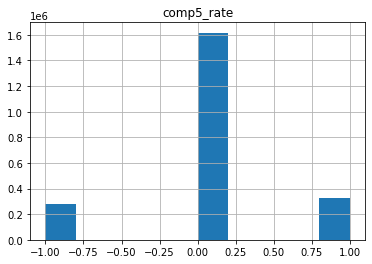

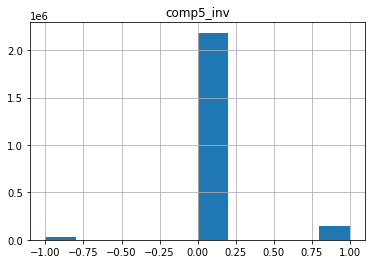

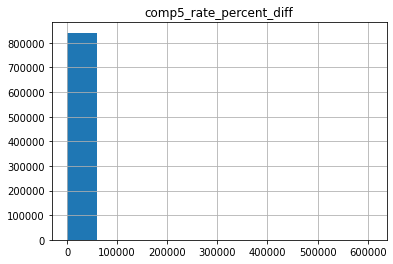

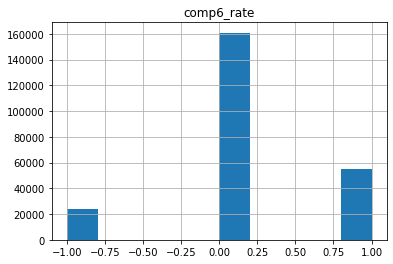

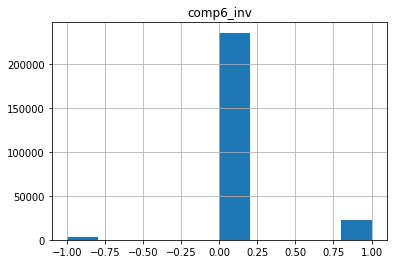

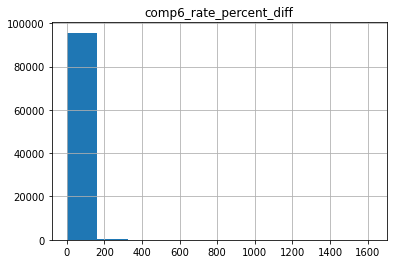

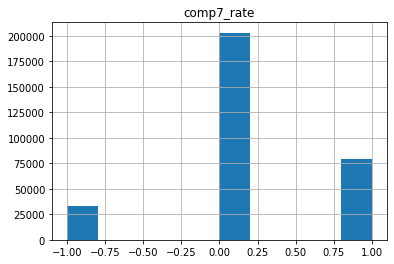

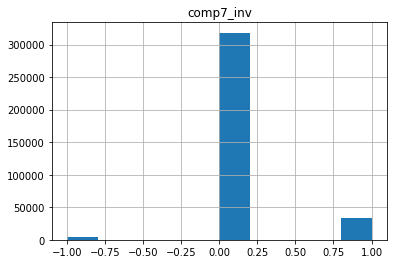

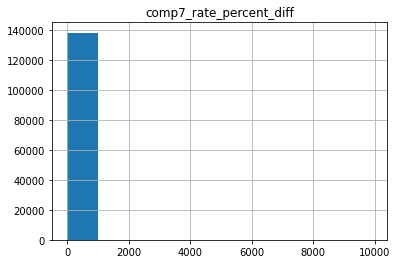

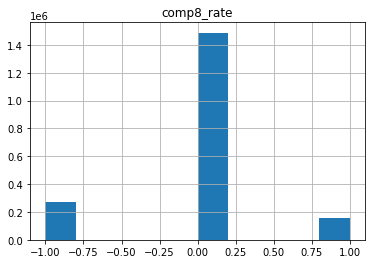

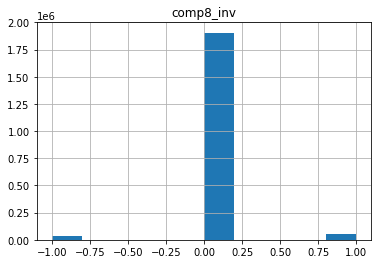

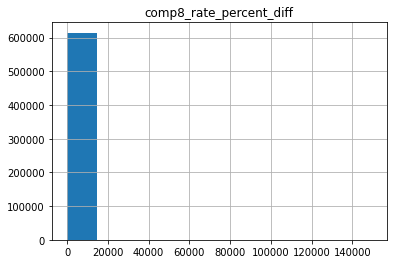

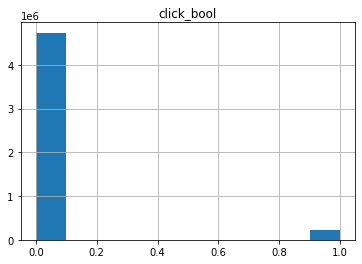

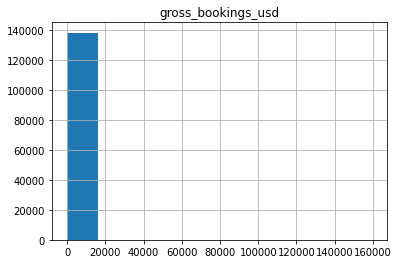

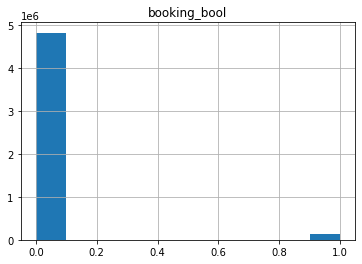

In [41]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

for col in df.select_dtypes(include=numerics).columns:
    df.hist(col)

In [42]:
# I think monotonnic means somethinng different
df.apply(lambda x: x.is_monotonic)

srch_id                         True
date_time                      False
site_id                        False
visitor_location_country_id    False
visitor_hist_starrating        False
visitor_hist_adr_usd           False
prop_country_id                False
prop_id                        False
prop_starrating                False
prop_review_score              False
prop_brand_bool                False
prop_location_score1           False
prop_location_score2           False
prop_log_historical_price      False
position                       False
price_usd                      False
promotion_flag                 False
srch_destination_id            False
srch_length_of_stay            False
srch_booking_window            False
srch_adults_count              False
srch_children_count            False
srch_room_count                False
srch_saturday_night_bool       False
srch_query_affinity_score      False
orig_destination_distance      False
random_bool                    False
c

In [47]:
corr=df.corr().abs()


comp6_rate_percent_diff  position                   0.000012
position                 comp6_rate_percent_diff    0.000012
comp5_rate               price_usd                  0.000015
price_usd                comp5_rate                 0.000015
random_bool              gross_bookings_usd         0.000053
                                                      ...   
booking_bool             booking_bool               1.000000
click_bool               gross_bookings_usd              NaN
gross_bookings_usd       click_bool                      NaN
                         booking_bool                    NaN
booking_bool             gross_bookings_usd              NaN
Length: 2809, dtype: float64

In [51]:
corrs = corr.unstack().sort_values(kind="quicksort", ascending=False)
corrs = corrs[corrs!=1]
corrs.head(30)


click_bool                   booking_bool                   0.782889
booking_bool                 click_bool                     0.782889
comp8_rate                   comp5_rate                     0.636605
comp5_rate                   comp8_rate                     0.636605
comp8_rate_percent_diff      comp3_rate_percent_diff        0.634962
comp3_rate_percent_diff      comp8_rate_percent_diff        0.634962
                             comp5_rate_percent_diff        0.590658
comp5_rate_percent_diff      comp3_rate_percent_diff        0.590658
comp5_inv                    comp1_inv                      0.512121
comp1_inv                    comp5_inv                      0.512121
comp8_rate                   comp4_rate                     0.510133
comp4_rate                   comp8_rate                     0.510133
comp2_rate                   comp3_rate                     0.510067
comp3_rate                   comp2_rate                     0.510067
comp6_rate                   comp7

In [52]:
for col in df.columns:
    print(col)

srch_id
date_time
site_id
visitor_location_country_id
visitor_hist_starrating
visitor_hist_adr_usd
prop_country_id
prop_id
prop_starrating
prop_review_score
prop_brand_bool
prop_location_score1
prop_location_score2
prop_log_historical_price
position
price_usd
promotion_flag
srch_destination_id
srch_length_of_stay
srch_booking_window
srch_adults_count
srch_children_count
srch_room_count
srch_saturday_night_bool
srch_query_affinity_score
orig_destination_distance
random_bool
comp1_rate
comp1_inv
comp1_rate_percent_diff
comp2_rate
comp2_inv
comp2_rate_percent_diff
comp3_rate
comp3_inv
comp3_rate_percent_diff
comp4_rate
comp4_inv
comp4_rate_percent_diff
comp5_rate
comp5_inv
comp5_rate_percent_diff
comp6_rate
comp6_inv
comp6_rate_percent_diff
comp7_rate
comp7_inv
comp7_rate_percent_diff
comp8_rate
comp8_inv
comp8_rate_percent_diff
click_bool
gross_bookings_usd
booking_bool
